In [1]:
import matplotlib.pyplot as plt
import numpy as np  
import random
from scipy.interpolate import lagrange 
from helper import print_funcan, f

In [2]:
def interpolation_lagrange(init_args: list[float], init_values: list[float], interpol_args: list[float]) -> list[float]:
    y = []
    for x in interpol_args:
        res = 0
        for i, val1 in enumerate(init_args):
            cur_res = init_values[i]
            for j, val2 in enumerate(init_args):
                if i == j:
                    continue
                cur_res *= (x - val2) / (val1 - val2)
            res += cur_res
        y.append(res)

    return y

In [3]:
def task_1(init_args=[]) -> None:
    if len(init_args) == 0:
        init_args = [-0.963, -0.12, 0.67, 1]
    # build init values
    init_values = [f(v) for v in init_args] 

    h = 0.01
    x = np.arange(-1, 1, h) 
    y = interpolation_lagrange(init_args, init_values, x)

    # numerical-analytical relative error 
    dev = 0
    max_y = max([abs(f(x0)) for x0 in x])
    for i in range(len(x)):
        dev = max(dev, abs(f(x[i]) - y[i]) / max_y)
    print(round(dev, 3))

    print_funcan(x, y)

In [4]:
def task_2() -> None:
    X = [-0.4, 0, 0.2, 0.5]
    task_1(X)

In [5]:
def task_3(h) -> float:
    # generate inition array
    x =  - random.randint(58, 100) / 100
    init_args = []
    while x <= 1: 
        init_args.append(x)
        x += 0.3
    dev = 0
    init_values = [f(v) for v in init_args]
    x = np.linspace(min(init_args), max(init_args), 10)
    y = interpolation_lagrange(init_args, init_values, x)
    max_y = max([abs(f(x0)) for x0 in x])
    for i in range(len(x)):
        dev = max(dev, abs(f(x[i]) - y[i]) / max_y)

    print(round(dev, 3))

0.055


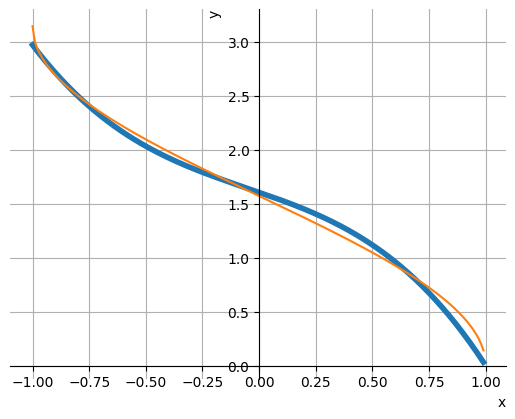

0.122


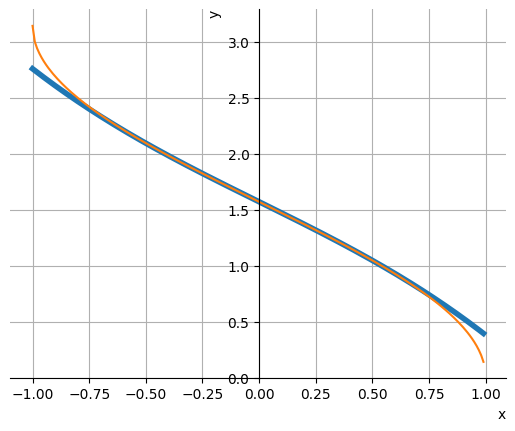

0.0


In [6]:
task_1()
task_2()
task_3(0.1)